In [37]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from importlib import reload
from scipy.linalg import solve_banded
reload(plt)
%matplotlib notebook

from numba import njit

In [40]:
u = lambda x1, x2: x1 ** 2 + x2 ** 2

u_x1_0 = lambda x: x ** 2
u_x1_1 = lambda x: 1 + x ** 2

u_x2_0 = lambda x: x ** 2
u_x2_1 = lambda x: 1 + x ** 2

f_const = 4

In [61]:

def solve_dirichlet(h1, h2, u_x1_0, u_x1_1, u_x2_0, u_x2_1, f_const, max_iter):
    N1 = math.ceil(1 / h1) + 1;
    N2 = math.ceil(1 / h2) + 1;    

    y = np.zeros(shape=(N1, N2))
    
    x1 = np.linspace(0, 1, N2)
    y[0, :] = u_x1_0(x1)
    y[-1, :] = u_x1_1(x1)
    
    x2 = np.linspace(0, 1, N1)
    y[:, 0] = u_x2_0(x2)
    y[:, -1] = u_x2_1(x2)
    
    for it in range(max_iter):
        for i in range(1, N1 - 1):
            for j in range(1, N2 - 1):
                y[i, j] = ((y[i+1, j] + y[i-1, j]) / h1 / h1 + (y[i, j+1] + y[i, j-1]) / h2 / h2 - f_const ) / (2 / h1 / h1 + 2 / h2 / h2)
    
    return y


In [65]:
h1 = 0.05
h2 = 0.05
max_iter = 10000

y = solve_dirichlet(h1, h2, u_x1_0, u_x1_1, u_x2_0, u_x2_1, f_const, max_iter)

In [90]:
def plot(y, u, h1, h2, title):
    N1 = y.shape[1]
    N2 = y.shape[0]
    X1 = h1 * np.arange(N1)
    X2 = h2 * np.arange(N2)
    XX1, XX2 = np.meshgrid(X1, X2)

    Z = u(XX1, XX2)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(XX1, XX2, Z, label='original solution"')
    surf._edgecolors2d= surf._edgecolors3d
    surf._facecolors2d= surf._facecolors3d
    
    ax.scatter3D(XX1, XX2, y, c='Red', s=1, label='numerical solution');
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('u')
    ax.set_title(title);
    ax.legend(loc ='lower right')

<IPython.core.display.Javascript object>


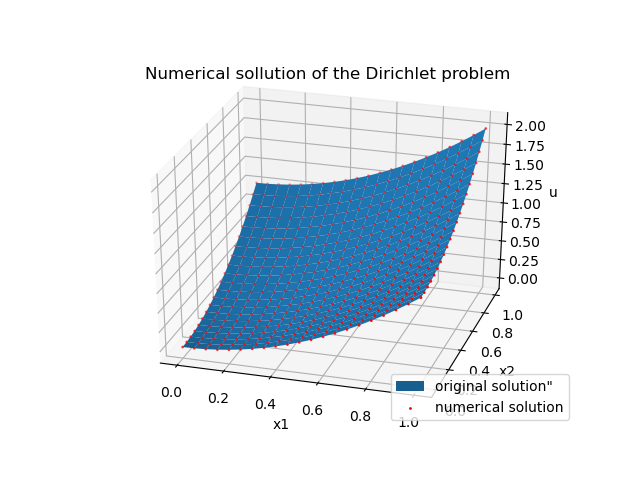

In [91]:
plot(y, u, h1, h2, "Numerical sollution of the Dirichlet problem")